**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



**Set global variables**

In [2]:
TXT_FOLDER_REGION = "fcc_crispri_growth"

In [3]:
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder)
vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

K562.hg38.CRISPRi_Growth.signif.bed.gz 
K562.hg38.CRISPRi_Growth.total.bed.gz 
summary 


In [4]:
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder, "summary")
vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

description.tsv 
metadata.label.tsv 


## Import data

In [5]:
### set directory
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder, "summary")
txt_fname  = "description.tsv"
txt_fpath  = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, show_col_types = FALSE)
vec = dat$Name

### assign and show
vec_txt_cname = vec
fun_display_table(dat)

Name,Note
Chrom,Name of the chromosome
ChromStart,The starting position of the feature in the chromosome
ChromEnd,The ending position of the feature in the chromosome
Region,Region location
Guide_ID,ID of significant guide within the DHS
Log2FC,log2foldchange of the guide
Padj,Adjusted p value of the guide
Group,Assay Name
Label,Assay Name


In [8]:
### set directory
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder)
txt_fname  = "K562.hg38.CRISPRi_Growth.signif.bed.gz"
txt_fpath  = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, col_names = vec_txt_cname, show_col_types = FALSE)

### assign and show
dat_region_cgrowth_signif = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 6242    9


Chrom,ChromStart,ChromEnd,Region,Guide_ID,Log2FC,Padj,Group,Label
chr1,605550,605627,chr1:605550-605627,chr1.1.1,-0.9859338,0.0000000,CRISPRi-Growth,Signif
chr1,826642,827902,chr1:826642-827902,chr1.4.8,0.1855074,0.0325051,CRISPRi-Growth,Signif
chr1,964946,965136,chr1:964946-965136,chr1.41.7,-1.1466792,0.0000000,CRISPRi-Growth,Signif


In [9]:
### set directory
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder)
txt_fname  = "K562.hg38.CRISPRi_Growth.total.bed.gz"
txt_fpath  = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, col_names = vec_txt_cname, show_col_types = FALSE)

### assign and show
dat_region_cgrowth_total = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 1092166       9


Chrom,ChromStart,ChromEnd,Region,Guide_ID,Log2FC,Padj,Group,Label
chr1,605550,605627,chr1:605550-605627,chr1.1.1,-0.9859338,0.0000000,CRISPRi-Growth,Total
chr1,605550,605627,chr1:605550-605627,chr1.1.2,0.0175568,0.8618381,CRISPRi-Growth,Total
chr1,605550,605627,chr1:605550-605627,chr1.1.3,0.0142221,0.9074943,CRISPRi-Growth,Total


## Explore: Coverage

In [11]:
dat = dat_region_cgrowth_total
dat = dat %>%
    dplyr::select(Region, Guide_ID) %>%
    dplyr::distinct()

dat = dat %>%
    dplyr::group_by(Region) %>%
    dplyr::summarise(Count = n())

table(dat$Count)


     1      2      3      4      5      6      7      8      9     10 
   354    366    496    563    695    748    862    891   1055 105672 

## Explore: Log2 Fold Change

Warning message:
“Removed 4698 rows containing non-finite outside the scale range
(`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale
range (`geom_bar()`).”


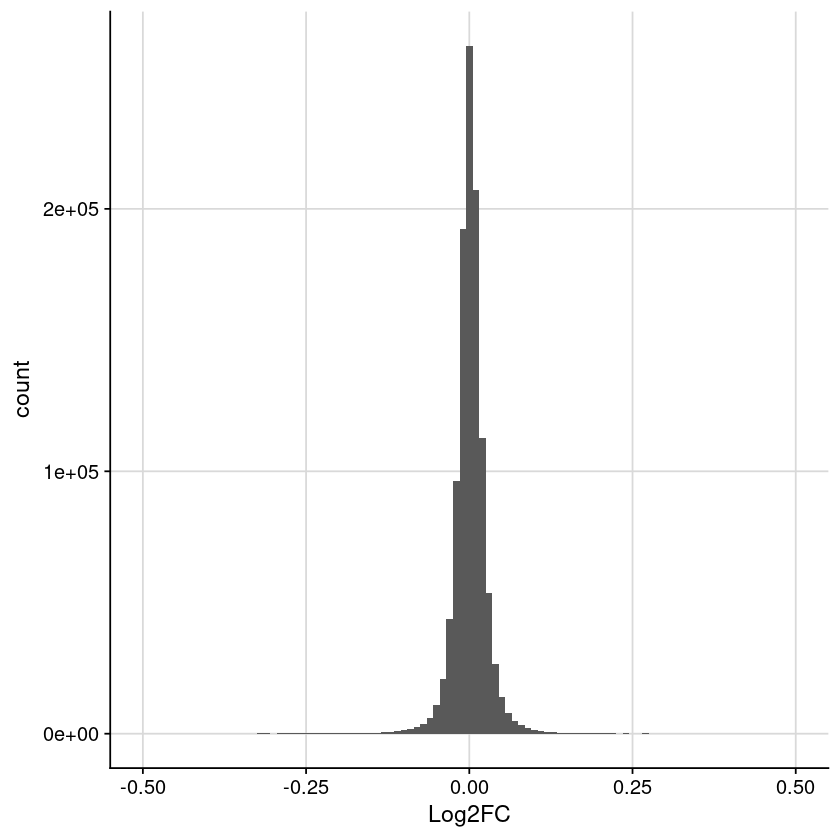

In [19]:
dat = dat_region_cgrowth_total
gpt = ggplot(dat, aes(x=Log2FC)) + 
    geom_histogram(binwidth=0.01) +
    xlim(-0.5, 0.5) +
    theme_cowplot() + 
    background_grid()
print(gpt)

## Explore: signif

In [27]:
dat = dat_region_cgrowth_total
dat = dat %>% dplyr::filter(Padj < 0.05)

dat = dat %>% 
    dplyr::group_by(Region) %>% 
    dplyr::slice(which.min(Padj))

dat = dat %>% 
    dplyr::arrange(Chrom, ChromStart, ChromEnd)

### assign and show
dat_region_check = dat
print(dim(dat))
fun_display_table(head(dat))

[1] 6242    9


Chrom,ChromStart,ChromEnd,Region,Guide_ID,Log2FC,Padj,Group,Label
chr1,605550,605627,chr1:605550-605627,chr1.1.1,-0.9859338,0.0000000,CRISPRi-Growth,Total
chr1,826642,827902,chr1:826642-827902,chr1.4.8,0.1855074,0.0325051,CRISPRi-Growth,Total
chr1,964946,965136,chr1:964946-965136,chr1.41.7,-1.1466792,0.0000000,CRISPRi-Growth,Total
chr1,995761,996190,chr1:995761-996190,chr1.53.2,0.2141075,0.0187409,CRISPRi-Growth,Total
chr1,1067929,1070953,chr1:1067929-1070953,chr1.74.8,-0.3383702,0.0337196,CRISPRi-Growth,Total
chr1,1155362,1155639,chr1:1155362-1155639,chr1.106.10,-0.5858502,0.0003198,CRISPRi-Growth,Total


In [28]:
dat = dat_region_cgrowth_signif
print(dim(dat))
fun_display_table(head(dat))

[1] 6242    9


Chrom,ChromStart,ChromEnd,Region,Guide_ID,Log2FC,Padj,Group,Label
chr1,605550,605627,chr1:605550-605627,chr1.1.1,-0.9859338,0.0000000,CRISPRi-Growth,Signif
chr1,826642,827902,chr1:826642-827902,chr1.4.8,0.1855074,0.0325051,CRISPRi-Growth,Signif
chr1,964946,965136,chr1:964946-965136,chr1.41.7,-1.1466792,0.0000000,CRISPRi-Growth,Signif
chr1,995761,996190,chr1:995761-996190,chr1.53.2,0.2141075,0.0187409,CRISPRi-Growth,Signif
chr1,1067929,1070953,chr1:1067929-1070953,chr1.74.8,-0.3383702,0.0337196,CRISPRi-Growth,Signif
chr1,1155362,1155639,chr1:1155362-1155639,chr1.106.10,-0.5858502,0.0003198,CRISPRi-Growth,Signif


In [30]:
dat  = dat_region_cgrowth_signif
vec1 = dat$Region

dat = dat_region_check
vec2 = dat$Region

print(all(vec1 == vec2))

[1] TRUE
